This notebook is intended to anyalize and desplay the data from the cataloges generated

In [37]:
#steal the includes from the other journals
from astropy.io import fits
from astropy.table import Table#helps read sexfiles
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
from astropy import wcs
import scipy as sp
import math
from io import StringIO
from astropy.io import ascii

In [5]:
#import the catalogues
j0205Red="/home/wes/Astronomy/Code/catalog_creation/source_extractor/j0205red.fits"
j0205Blue="/home/wes/Astronomy/Code/catalog_creation/source_extractor/j0205blue.fits"
hdulist = fits.open(j0205Red)
r=Table.read(hdulist[1])#r = red
hdulist = fits.open(j0205Blue)
b=Table.read(hdulist[1])#b= blue

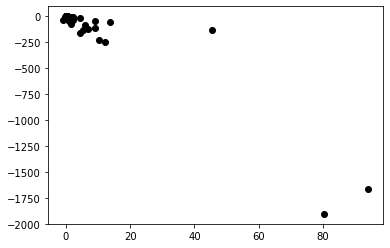

In [29]:
#lets make a b-r to b plot
dF=b['FLUX_AUTO']-r['FLUX_AUTO']#dF = delta Flux
bx=b['FLUX_AUTO']#bx = b axis
#print(dF)
#print(bx)
plt.plot(bx, dF, 'o', color='black');

Okay, I see 3 "outliers" I never fixed those weight problems so maybe thats the cause, for now I am going to manualy remove these 3 untill I get something out of this graph then I am going to fix code.

In [25]:
#code to help me find the max blue flux galaxy.
#first run 1119
bucket=0
bucket1=0
bucket2=0
bucketnum=-1
bucketnum1=-1
bucketnum2=-1
for i in range(0,len(bx)):
    if(bx[i]>bucket):
        bucket2=bucket1
        bucketnum2=bucketnum1
        bucket1=bucket
        bucketnum1=bucketnum
        bucket=bx[i]
        bucketnum=i
toDelete=[bucketnum,bucketnum1,bucketnum2]
print(bucketnum)
print(bx[bucketnum])
print(dF[bucketnum])

print(bucketnum1)
print(bx[bucketnum1])
print(dF[bucketnum1])

print(bucketnum2)
print(bx[bucketnum2])
print(dF[bucketnum2])

1119
93.81167309806504
-1666.6885858928297
15
80.16843835326375
-1905.4800419018795
12
10.334173188312622
-226.79834006206175


1441
1438


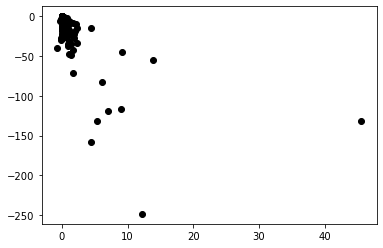

In [43]:
ndF = np.zeros(len(dF))#new dF
nbx = np.zeros(len(bx))
for i in range(0,len(bx)):
    ndF[i] = dF[i]
    nbx[i] = bx[i]
dndF=np.delete(ndF,toDelete)#deleted new dF
dnbx=np.delete(nbx,toDelete)
print(len(ndF))
print(len(dndF))
plt.plot(dnbx, dndF, 'o', color='black');
#for i in range(0,len(dnbx)):
#    dndF[i] = math.log(abs(dndF[i]),10)
#    dnbx[i] = math.log(abs(dnbx[i]),10)
#plt.plot(dnbx, dndF, 'o', color='black');
#there are kind of two lines, star-forming vs quesent, we will probably see once we have more data

(-40.0, 1.0)

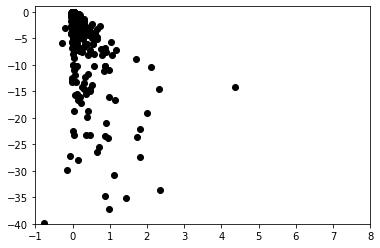

In [53]:
#what was i thinking ealier, just zoom in
plt.plot(dnbx, dndF, 'o', color='black');
ax = plt.gca()
ax.set_xlim([-1, 8])
ax.set_ylim([-40, 1])
